In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

import scipy.stats as st
from sklearn import preprocessing as pre

In [2]:
flights = pd.read_csv('../Data/files/flights_no_missing.csv')
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

**Flights that were not delayed**

Let's filter out the data for flights that didn't get delayed. These are those whose `dep_delay` values are less than or equal to 0.

In [71]:
flights_on_time = flights[['dep_delay', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time']].query('dep_delay <= 0')

**Flights that were delayed**

To do the same for the flights that didn't get delayed, we filter out the rows with `dep_delay` values that are greater than 0.

In [72]:
flights_delayed = flights[['dep_delay', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time']].query('dep_delay > 0')

To test the hypothesis that planes fly faster when there is a departure delay, we perform a t-test on the means of the Actual Elapsed Time of Flight (actual_elapsed_time) and Flight Time (air_time).

In [73]:
flights_on_time.mean()

dep_delay               -5.013855
crs_elapsed_time       135.523854
actual_elapsed_time    130.307149
air_time               105.335696
dtype: float64

In [74]:
flights_delayed.mean()

dep_delay               40.448515
crs_elapsed_time       143.308628
actual_elapsed_time    138.713736
air_time               113.070094
dtype: float64

In [75]:
flights_on_time.air_time.mean()

105.33569625207693

In [76]:
flights_delayed.air_time.mean()

113.07009414995218

In [77]:
flights_on_time.actual_elapsed_time.mean()

130.30714876343683

In [78]:
flights_delayed.actual_elapsed_time.mean()

138.71373620443416

TBD

In [118]:
st.ttest_ind(flights_on_time.actual_elapsed_time, flights_delayed.actual_elapsed_time)

TypeError: ttest_ind() got an unexpected keyword argument 'alternative'

In [117]:
st.ttest_ind(flights_on_time.air_time, flights_delayed.air_time)

Ttest_indResult(statistic=-80.5826736445401, pvalue=0.0)

Since we returned p-values of zero, there was not enough information in the data to reject our null hypothesis.

We preview some columns that we need that are relevant to the origin/departure and destination/arrival airports.

In [83]:
np.full(shape=796814, fill_value=500, dtype=np.int)

array([500, 500, 500, ..., 500, 500, 500])

In [113]:
st.ttest_ind(flights_on_time.actual_elapsed_time.sample(796814), np.full(shape=796814, fill_value=-10000000, dtype=np.int), equal_var=False)

Ttest_indResult(statistic=126431450.26668699, pvalue=0.0)

In [43]:
flights_on_time.actual_elapsed_time.shape

(1543148,)

In [44]:
flights_delayed.actual_elapsed_time.shape

(796814,)

In [55]:
flights_on_time.actual_elapsed_time

0           51.0
1          102.0
2          184.0
3           68.0
4           80.0
           ...  
2339955    116.0
2339956     96.0
2339958    107.0
2339959     78.0
2339960     76.0
Name: actual_elapsed_time, Length: 1543148, dtype: float64

In [58]:
flights_delayed.actual_elapsed_time

8          151.0
15          95.0
17          88.0
23          55.0
26         157.0
           ...  
2339950    141.0
2339952    389.0
2339954    187.0
2339957    211.0
2339961    154.0
Name: actual_elapsed_time, Length: 796814, dtype: float64

In [ ]:
sns.scatterplot(data=flights, x='dep_delay', y='actual_elapsed_time')

<AxesSubplot:xlabel='dep_delay', ylabel='actual_elapsed_time'>

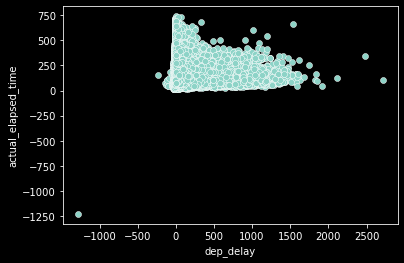

In [8]:
sns.scatterplot(data=flights, x='dep_delay', y='actual_elapsed_time')

<AxesSubplot:xlabel='dep_delay', ylabel='crs_elapsed_time'>

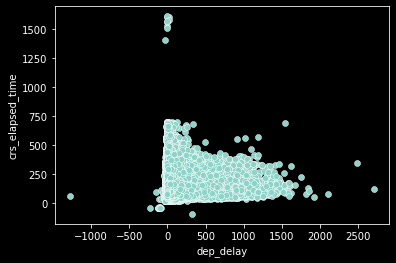

In [9]:
sns.scatterplot(data=flights, x='dep_delay', y='crs_elapsed_time')

<AxesSubplot:xlabel='dep_delay', ylabel='air_time'>

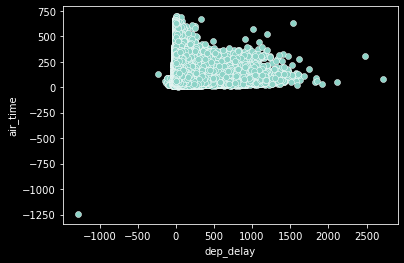

In [10]:
sns.scatterplot(data=flights, x='dep_delay', y='air_time')

<AxesSubplot:xlabel='air_time', ylabel='dep_delay'>

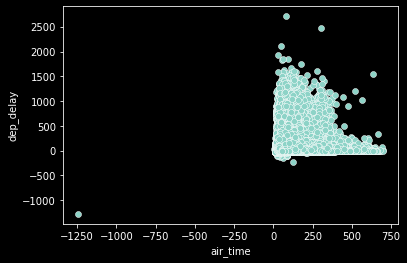

In [11]:
sns.scatterplot(data=flights, x='air_time', y='dep_delay')

In [ ]:
# Box plot
sns.boxplot(x='crs_dep_time', data=flights)
# Distribution plot
sns.displot(data=flights, x='crs_dep_time', kind='hist', kde=True)

In [ ]:
flights

In [ ]:
sns.scatterplot(data=flights, x='dep_delay', y='actual_elapsed_time')